In [14]:
"""
    alpha, beta, sigma = linear_regression(x, y)

Least square fit y = alpha + beta x. sigma is the standard error of beta
"""
function linear_regression(x, y)
    np = length(x)
    xbar = sum(x)/np
    ybar = sum(y)/np
    x2 = sum((x .- xbar) .^ 2)
    beta = sum((y .- ybar) .* (x .- xbar))/x2
    alpha = ybar - beta*xbar
    sigma = sqrt(sum((y .- alpha .- beta .* x) .^ 2)/((np - 2)*x2))
    return alpha, beta, sigma
end

#NEEDED FOR MIDTERM 2

linear_regression

In [9]:
xmin = 0.0
xmax = 10.0
np = 200
sc = 1.5
x = range(xmin, xmax, np)
y = 2 .* x .+ sc .* randn(np);

In [10]:
alpha1, beta1, sigma1 = linear_regression(x, y)

(0.21151862553174894, 1.9400181863521988, 0.03814589386393274)

In [11]:
using PyPlot

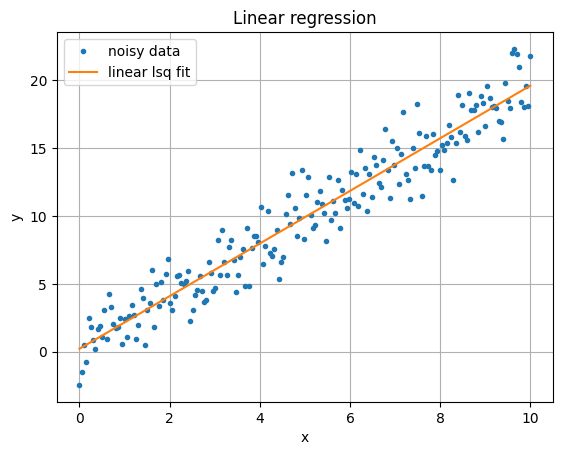

In [13]:
plot(x, y, linestyle="none", marker=".", label="noisy data")
plot(x, alpha1 .+ beta1 .* x, linestyle="solid", label="linear lsq fit")

grid(true)
xlabel("x")
ylabel("y")
title("Linear regression")
legend();

# Bouncing Ball

In [3]:
using OrdinaryDiffEqTsit5
using PyPlot

In [4]:
#RHS of ODE
function bouncingball!(dudtau, u, G, tau)
    dudtau[1] = u[2]
    dudtau[2] = -G
    return nothing
end

bouncingball! (generic function with 1 method)

In [5]:
function condition(u, t, integrator)
  u[1] - sin(t)
end

condition (generic function with 1 method)

In [6]:
function affect!(integrator)
    integrator.u[2] = -integrator.u[2] + 2*cos(integrator.t)
end

affect! (generic function with 1 method)

In [7]:

cb = ContinuousCallback(condition, affect!);

In [8]:

u0 = [0.0001, 0.0]
G = 1.0
tspan = (0.0, 100.0);

In [9]:
prob = ODEProblem(bouncingball!, u0, tspan, G)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 100.0)
u0: 2-element Vector{Float64}:
 0.0001
 0.0

In [10]:
sol = solve(prob, Tsit5(), callback=cb, dtmax=0.1);

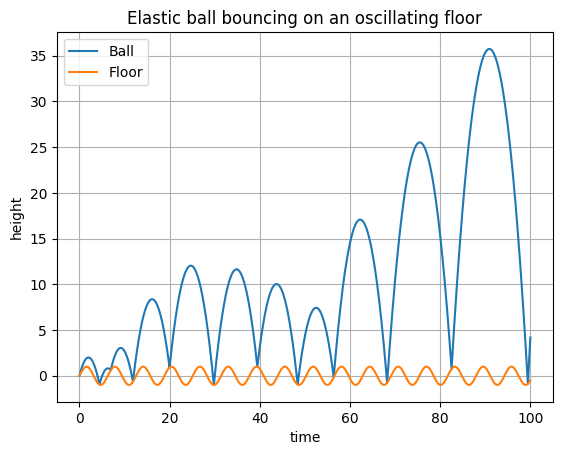

In [11]:

plot(sol.t, sol[1,:], label="Ball")
plot(sol.t, sin.(sol.t), label="Floor")
grid(true)
xlabel("time")
ylabel("height")
legend()
title("Elastic ball bouncing on an oscillating floor");

In [12]:

function energy(sol, G)
    G * sol[1, :] .+ 0.5 .* (sol[2, :]) .^ 2
end

energy (generic function with 1 method)

In [13]:
en = energy(sol, G);

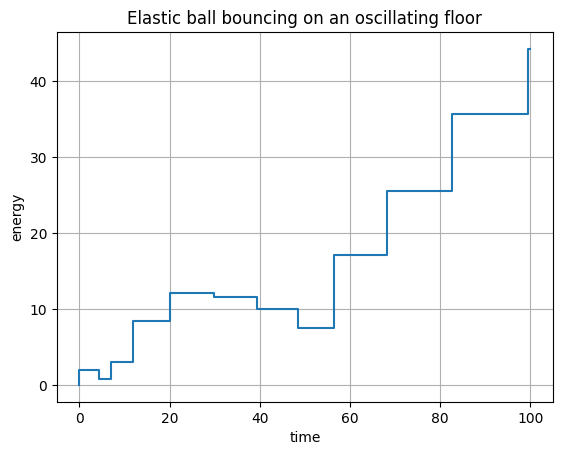

In [14]:

plot(sol.t, en)
grid(true)
xlabel("time")
ylabel("energy")
title("Elastic ball bouncing on an oscillating floor");